## CONTENTS 
##### 1  Importing Various Libraries and Models.
##### 2  Preparing the Data
##### 3  Modelling
##### 4  Evaluate Model performance
##### 5  Visualizing Predictons on the Validation Set


## Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, Activation, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model


In [4]:
import warnings
warnings.filterwarnings('ignore')

### CNN Model Configuration

In [39]:
Batch_size = 20 # init batch size
loss_function = categorical_crossentropy
no_classes = 11
no_epochs = 50 # init number of epochs for training
optimizer = Adam()
verbosity = 1
img_shape = (100,100)

# Data Exploration

### Load Data

#### Database Path

In [40]:
# Create paths to folders
train_path = './training/'
valid_path = './validation/'
test_path = './evaluation/'

### Data Augmentation to prevent overfitting

#### Creating Generators
Set up data generators that will read images in our source folders. This ImageDataGenerator class allows for instantiating generators of augmented image batches (and their labels) via .flow_from_directory(directory).

All images will be rescaled by 1./255

In [41]:
# Flow training images in batches of 20 
# All images will be resized to 100*100

# Reading training dataset from directory
train_batches = ImageDataGenerator(rescale=1./255, horizontal_flip = True, preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=img_shape, batch_size=Batch_size)

# Reading validation dataset from directory
valid_batches = ImageDataGenerator(rescale=1./255, horizontal_flip = True, preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=img_shape, batch_size=Batch_size)

# Reading testing set from directory
test_batches = ImageDataGenerator(rescale=1./255, horizontal_flip = True, preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=img_shape, batch_size=Batch_size, shuffle=False)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [8]:
classes = list(train_batches.class_indices.keys())
print('Classes: '+str(classes))

Classes: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


## Data Analysis

#### Visualize the data

In [9]:
#load image with Keras API 
from keras.preprocessing.image import load_img

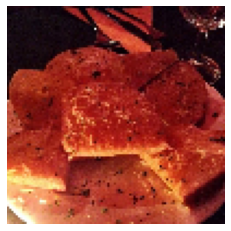

In [10]:
#load the image
img = load_img(train_path + "Bread/4.jpg", target_size=img_shape)
plt.imshow(img)
plt.axis("off")
plt.show()

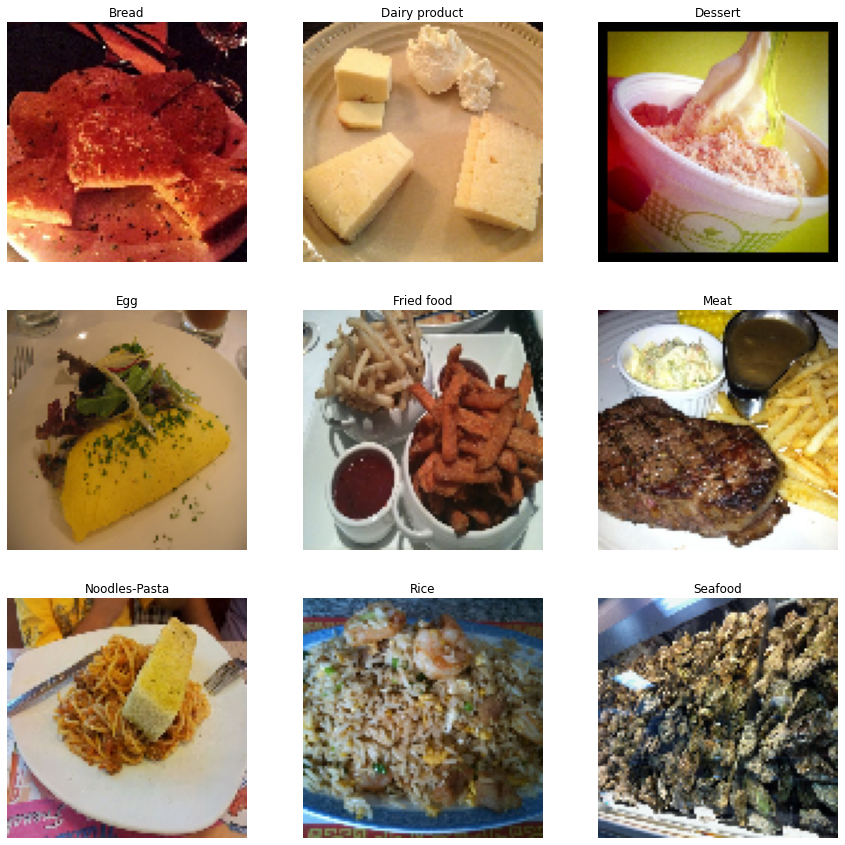

In [11]:
fig = plt.figure(figsize =(15,15))

# This function will plot images in the form of a grid with 3 rows and 3 columns where
# images are placed in each column.

for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(classes[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + classes[i] +"/4.jpg", target_size=img_shape))

#### Early Stopping

In [12]:
#Callback to save the best model

from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

# Create Model

### CNN Model

In [13]:
# Create the model
model = Sequential()


#FIRST LAYER
# a convolution layer of 32 features of size 3x3 with relu activation and image shape of 100x100
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
# maxpooling layer of filter size 2x2
MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')
# a dropout layer of 20%
model.add(Dropout(0.2))


#SECOND LAYER
# a convolution layer of 64 features of size 3x3 with relu activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# maxpooling layer of filter size 2x2
MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')
# a dropout layer of 20%
model.add(Dropout(0.2))


#THIRD LAYER
# a convolution layer of 128 features of size 3x3 with relu activation
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# maxpooling layer of filter size 2x2
MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')
# a dropout layer of 20%
model.add(Dropout(0.2))


# flatten the output of the previous layer
model.add(Flatten())
# add a dense layer that outputs 128 units and apply relu activation
model.add(Dense(128, activation='relu'))
# a dropout layer of 20%
model.add(Dropout(0.2))


#FINAL LAYER
# add a dense layer with a softmax activation to classify the images
model.add(Dense(no_classes, activation='softmax'))


# Compile the model
# Measure difference from prediction to ground truth
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 96, 96, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 94, 94, 128)       0         
                                                                 
 flatten (Flatten)           (None, 1131008)           0

### Training
Training for 50 epochs -- this may take a few minutes to run.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.

In [15]:
# Fit data to Model

history = model.fit(
        train_batches,
        epochs=no_epochs,
        validation_data=valid_batches,
        verbose = verbosity,
        callbacks=[early_stop], batch_size=Batch_size)

Epoch 1/50
494/494 [==============================] - 709s 1s/step - loss: 2.2989 - accuracy: 0.1991 - val_loss: 2.1580 - val_accuracy: 0.2181
Epoch 2/50
494/494 [==============================] - 702s 1s/step - loss: 2.1536 - accuracy: 0.2268 - val_loss: 2.1665 - val_accuracy: 0.2239
Epoch 3/50
494/494 [==============================] - 696s 1s/step - loss: 2.1090 - accuracy: 0.2455 - val_loss: 2.0942 - val_accuracy: 0.2329
Epoch 4/50
494/494 [==============================] - 699s 1s/step - loss: 2.0198 - accuracy: 0.2842 - val_loss: 2.1495 - val_accuracy: 0.2971
Epoch 5/50
494/494 [==============================] - 706s 1s/step - loss: 1.7752 - accuracy: 0.3817 - val_loss: 1.8698 - val_accuracy: 0.3534
Epoch 6/50
494/494 [==============================] - 700s 1s/step - loss: 1.4306 - accuracy: 0.5197 - val_loss: 1.8493 - val_accuracy: 0.3770
Epoch 7/50
494/494 [==============================] - 706s 1s/step - loss: 1.0334 - accuracy: 0.6648 - val_loss: 1.9144 - val_accuracy: 0.4055

In [16]:
#save CNN model for reuse
model.save("CNN-Model.h5")

In [ ]:
#Plot Accuracy and Loss over Epochs#
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
losses = pd.DataFrame(model.history.history)

In [19]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.298872,0.199068,2.157964,0.218076
1,2.153625,0.226840,2.166508,0.223907
2,2.108960,0.245490,2.094197,0.232945
3,2.019804,0.284208,2.149486,0.297085
4,1.775216,0.381715,1.869783,0.353353


<AxesSubplot:>

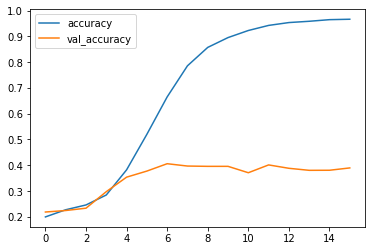

In [20]:
#plot accuracy against val_accuracy
losses[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

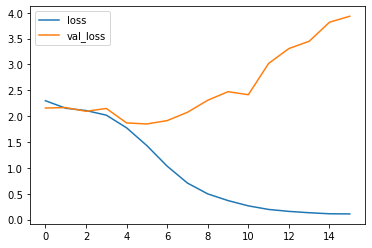

In [21]:
#plot loss against val_loss
losses[['loss', 'val_loss']].plot()

In [22]:
val_loss = list()  # validation loss
val_accuracy = list()  # validation accuracy
test_loss= list()  
test_accuracy = list()


In [15]:
#load best saved model
from tensorflow.keras.models import load_model

model = load_model("CNN-Model.h5")


In [24]:
#evaluate model using Test data
score = model.evaluate_generator(valid_batches)
val_loss.append(score[0])
val_accuracy.append(score[1])
print('\n\nVal loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate_generator(test_batches)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])



Val loss: 4.0206217765808105
Val accuracy: 0.3763848543167114

Test loss: 3.703864574432373
Test accuracy: 0.4323274493217468


#### Confusion Matrix

In [14]:
# import confusin matrix from sklearn library
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model.predict_generator(test_batches)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

In [27]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                 precision    recall  f1-score   support

          Bread       0.29      0.35      0.32       368
  Dairy product       0.36      0.11      0.17       148
        Dessert       0.42      0.33      0.37       500
            Egg       0.30      0.36      0.33       335
     Fried food       0.33      0.42      0.37       287
           Meat       0.53      0.60      0.56       432
  Noodles-Pasta       0.36      0.39      0.37       147
           Rice       0.39      0.22      0.28        96
        Seafood       0.47      0.35      0.40       303
           Soup       0.57      0.62      0.59       500
Vegetable-Fruit       0.70      0.64      0.67       231

       accuracy                           0.43      3347
      macro avg       0.43      0.40      0.40      3347
   weighted avg       0.44      0.43      0.43      3347



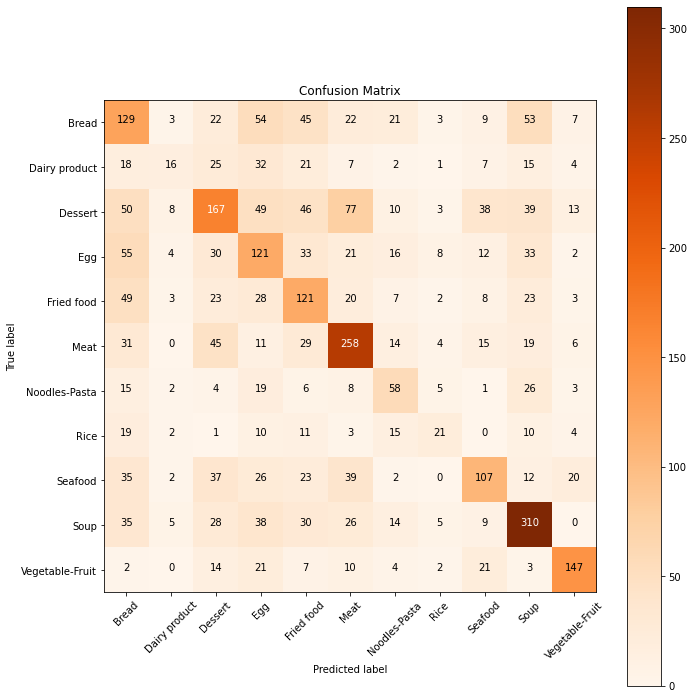

In [28]:
#Confution Matrix
cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

### Transfer learning using InceptionResNetV2

In [15]:
#import Inception-ResNet-V2 Library
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.optimizers import SGD
import os
import PIL
import random

In [16]:
# Load the inception resnetv2 model
basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, # Classification layer (output layer- sigmoid activations)
    input_shape = (256,256,3)
)

In [17]:
# print the model summary
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

 batch_normalization_5 (BatchNo  (None, 29, 29, 96)  288         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 64)  192         ['conv2d_11[0][0]']              
 ormalizat

 activation_21 (Activation)     (None, 29, 29, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 29, 29, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)             (None, 29, 29, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 29, 29, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 48)  144         ['conv2d_22[0][0]']              
 ormalizat

                                                                                                  
 activation_24 (Activation)     (None, 29, 29, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_26 (Activation)     (None, 29, 29, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 29, 29, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 29, 29, 48)  144         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 29, 29, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 29, 29, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 29, 29, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 29, 29, 128)  0           ['activation_42[0][0]',          
                                                                  'activation_44[0][0]',          
                                                                  'activation_47[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 29, 29, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 29, 29, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 29, 29, 320)  0           ['block35_6[0][0]']              
          

 activation_58 (Activation)     (None, 29, 29, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 29, 29, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_56 (Conv2D)             (None, 29, 29, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 29, 29, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 29, 29, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 29, 29, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 29, 29, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 29, 29, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 29, 29, 32)   0           ['batch_normalization_69[0][0]'] 
          

 activation_75 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 14, 14, 1088  0           ['activation_72[0][0]',          
                                )                                 'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 14, 14, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 14, 14, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_85 (Conv2D)             (None, 14, 14, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 14, 14, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 14, 14, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 14, 14, 128)  384        ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 14, 14, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94 (Conv2D)             (None, 14, 14, 160)  143360      ['activation_93[0][0]']          
          

                                                                                                  
 batch_normalization_101 (Batch  (None, 14, 14, 128)  384        ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_101 (Activation)    (None, 14, 14, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_102 (Conv2D)            (None, 14, 14, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 14, 14, 160)  480        ['conv2d_102[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_109 (Activation)    (None, 14, 14, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_110 (Conv2D)            (None, 14, 14, 160)  143360      ['activation_109[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 14, 14, 160)  480        ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_10

 conv2d_118 (Conv2D)            (None, 14, 14, 160)  143360      ['activation_117[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 14, 14, 160)  480        ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_118 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 14, 14, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_119 (Conv2D)            (None, 14, 14, 192)  215040      ['activation_118[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_124 (Conv2D)            (None, 14, 14, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_127 (Conv2D)            (None, 14, 14, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 14, 14, 192)  576        ['conv2d_124[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_132 (Conv2D)            (None, 14, 14, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_135 (Conv2D)            (None, 14, 14, 192)  215040      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 14, 14, 192)  576        ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 14, 14, 192)  576        ['conv2d_135[0][0]']             
 Normalization)                                                                                   
          

 conv2d_143 (Conv2D)            (None, 14, 14, 192)  215040      ['activation_142[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 14, 14, 192)  576        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 14, 14, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 14, 14, 192)  576        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_151 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 14, 14, 384)  0          ['activation_148[0][0]',         
          

 activation_156 (Activation)    (None, 14, 14, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 14, 14, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 14, 14, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 6, 6, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 6, 6, 288)    663552      ['activation_158[0][0]']         
                                                                                                  
 conv2d_16

                                                                                                  
 activation_169 (Activation)    (None, 6, 6, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 6, 6, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_170 (Conv2D)            (None, 6, 6, 256)    172032      ['activation_169[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 6, 6, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_175 (Batch  (None, 6, 6, 192)   576         ['conv2d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 6, 6, 256)   768         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 6, 6, 256)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_186 (Activation)    (None, 6, 6, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 6, 6, 448)    0           ['activation_183[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 6, 6, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 6, 6, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 6, 6, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 6, 6, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 6, 6, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 6, 6, 192)   576         ['conv2d_196[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 6, 6, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
Total params: 54,336,736
Trainable params: 54,276,192
Non-trainable params: 60,544
__________________________________________________________________________________________________


In [18]:
# Add classification head to the model
headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = "Global_Average_Pool")(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation = "relu", name = "dense_1")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = "dense_2")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(11, activation = "softmax", name = "output")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [19]:
for layer in basemodel.layers:
    layer.trainable = False

In [20]:
# compile model
model.compile(loss = loss_function, optimizer= SGD(
        lr = 0.01), metrics = ["accuracy"])

In [21]:
#The steps per epoch is calculated using the the total number of samples
#(train_batches.samples) divided by the Batch size, 
#so that we specify to the training model to do these steps in each epoch 
#to go through the whole training/validation dataset in each epoch

n_steps = train_batches.samples // Batch_size
n_val_steps = valid_batches.samples // Batch_size

In [22]:
#Train the model with 100 epochs
history = model.fit_generator(
            train_batches,validation_data=valid_batches,
            steps_per_epoch=n_steps,
            validation_steps=n_val_steps,
            epochs=100,callbacks=[early_stop],
            verbose = 1)

Epoch 1/100
493/493 [==============================] - 169s 326ms/step - loss: 2.0535 - accuracy: 0.3097 - val_loss: 1.7126 - val_accuracy: 0.4374
Epoch 2/100
493/493 [==============================] - 148s 301ms/step - loss: 1.7374 - accuracy: 0.4166 - val_loss: 1.5651 - val_accuracy: 0.4871
Epoch 3/100
493/493 [==============================] - 149s 302ms/step - loss: 1.6075 - accuracy: 0.4618 - val_loss: 1.4852 - val_accuracy: 0.5146
Epoch 4/100
493/493 [==============================] - 145s 294ms/step - loss: 1.5126 - accuracy: 0.4946 - val_loss: 1.4468 - val_accuracy: 0.5266
Epoch 5/100
493/493 [==============================] - 146s 296ms/step - loss: 1.4605 - accuracy: 0.5141 - val_loss: 1.4090 - val_accuracy: 0.5433
Epoch 6/100
493/493 [==============================] - 145s 294ms/step - loss: 1.3979 - accuracy: 0.5379 - val_loss: 1.3768 - val_accuracy: 0.5468
Epoch 7/100
493/493 [==============================] - 145s 295ms/step - loss: 1.3408 - accuracy: 0.5506 - val_loss: 1

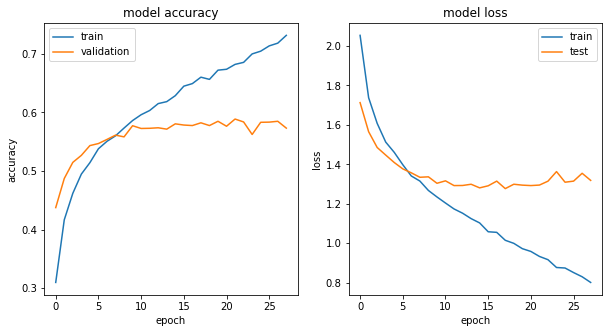

In [23]:
#plot accuracy and loss during training
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
InceptionResNetV2_losses = pd.DataFrame(model.history.history)

In [25]:
InceptionResNetV2_losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.053479,0.309669,1.712597,0.437427
1,1.737381,0.416616,1.565143,0.487135
2,1.607547,0.461812,1.485190,0.514620
3,1.512600,0.494617,1.446787,0.526608
4,1.460489,0.514117,1.408999,0.543275


### Model Evaluation

In [26]:
# Evaluate the performance of the model
# steps for each epoch is test_batches.samples divided by Batch size
evaluate = model.evaluate_generator(
    test_batches, 
    steps = test_batches.samples // Batch_size, 
    verbose = 1
)

print('Accuracy Test : {}'.format(evaluate[1]))

167/167 [==============================] - 42s 250ms/step - loss: 1.2687 - accuracy: 0.6105
Accuracy Test : 0.6104790568351746


### Inception ResNet V2 confusion matrix

In [27]:
V2_pred = model.predict_generator(test_batches)
y_pred = np.argmax(V2_pred, axis=1)
target_names = classes

In [28]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                 precision    recall  f1-score   support

          Bread       0.49      0.52      0.50       368
  Dairy product       0.50      0.36      0.42       148
        Dessert       0.54      0.52      0.53       500
            Egg       0.53      0.52      0.53       335
     Fried food       0.66      0.58      0.62       287
           Meat       0.56      0.53      0.55       432
  Noodles-Pasta       0.79      0.69      0.74       147
           Rice       0.75      0.56      0.64        96
        Seafood       0.53      0.68      0.60       303
           Soup       0.77      0.89      0.83       500
Vegetable-Fruit       0.71      0.64      0.68       231

       accuracy                           0.61      3347
      macro avg       0.62      0.59      0.60      3347
   weighted avg       0.61      0.61      0.60      3347



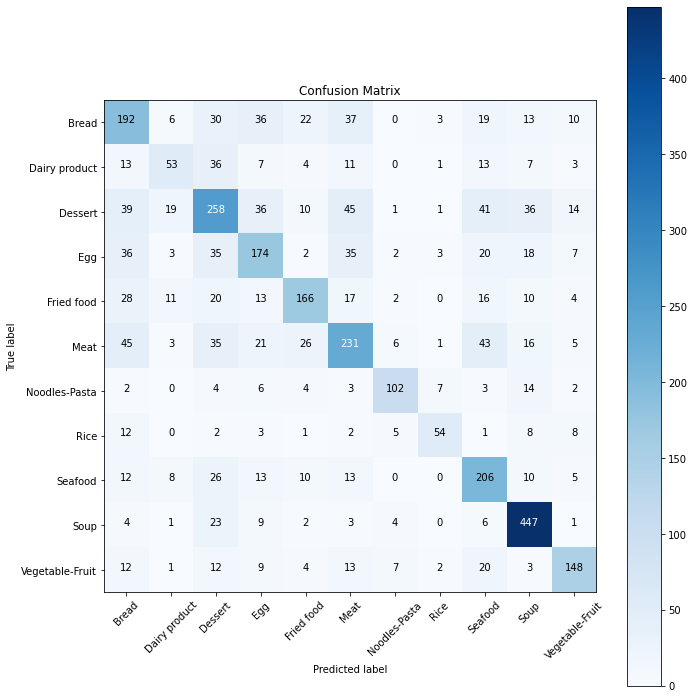

In [29]:
#Confution Matrix
cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

In [30]:
# save Inception-ResNet-V2 model for reuse
model.save("InceptionResNetV2-Model.h5")

## VGG-19 Model

In [13]:
#Bacth Configuration
TARGET_DIM = 300
BATCH_SIZE = 32

In [14]:
train_batches.class_indices

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [15]:
valid_batches.class_indices

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [16]:
#load the vgg-19 model
base_model = tf.keras.applications.vgg19.VGG19(
    include_top=False, 
    weights='imagenet', 
    input_shape=(TARGET_DIM, TARGET_DIM, 3)
)

In [17]:
# print laters in the model
print('Layers in Vgg19: ' + str(len(base_model.layers)))

Layers in Vgg19: 22


In [18]:
preds = base_model.output
preds = tf.keras.layers.GlobalAveragePooling2D()(preds)
preds = tf.keras.layers.Dense(1024, activation=tf.nn.relu)(preds)
preds = tf.keras.layers.BatchNormalization()(preds)
preds = tf.keras.layers.Dense(512, activation=tf.nn.relu)(preds)
preds = tf.keras.layers.BatchNormalization()(preds)
preds = tf.keras.layers.Dense(256, activation=tf.nn.relu)(preds)
preds = tf.keras.layers.BatchNormalization()(preds)
preds = tf.keras.layers.Dense(128, activation=tf.nn.relu)(preds)
preds = tf.keras.layers.Dense(11, activation=tf.nn.softmax)(preds)

In [19]:
model = tf.keras.models.Model(base_model.input, preds)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [21]:
#freeze the first 20 layers not to be trained
for layer in model.layers[:20]:
    layer.trainable = False

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [23]:
model.compile(loss = loss_function, optimizer= Adam(
        lr = 0.01), metrics = ["accuracy"])

In [24]:
# Trian Model with 100 Epochs
history = model.fit_generator(
    train_batches,
    steps_per_epoch=train_batches.samples // BATCH_SIZE,
    validation_data=valid_batches,
    validation_steps=valid_batches.samples // BATCH_SIZE,
    callbacks=[early_stop],
    epochs=100
)

Epoch 1/100
308/308 [==============================] - 227s 733ms/step - loss: 2.0357 - accuracy: 0.3355 - val_loss: 2.4063 - val_accuracy: 0.3491
Epoch 2/100
308/308 [==============================] - 226s 735ms/step - loss: 1.5603 - accuracy: 0.4740 - val_loss: 2.2140 - val_accuracy: 0.3678
Epoch 3/100
308/308 [==============================] - 226s 733ms/step - loss: 1.3987 - accuracy: 0.5265 - val_loss: 1.5527 - val_accuracy: 0.4888
Epoch 4/100
308/308 [==============================] - 227s 736ms/step - loss: 1.2942 - accuracy: 0.5692 - val_loss: 1.8068 - val_accuracy: 0.4855
Epoch 5/100
308/308 [==============================] - 224s 728ms/step - loss: 1.2022 - accuracy: 0.5997 - val_loss: 1.2914 - val_accuracy: 0.5902
Epoch 6/100
308/308 [==============================] - 230s 748ms/step - loss: 1.1312 - accuracy: 0.6269 - val_loss: 1.3336 - val_accuracy: 0.6000
Epoch 7/100
308/308 [==============================] - 225s 730ms/step - loss: 1.0851 - accuracy: 0.6468 - val_loss: 1

In [25]:
model.save("VGG19.h5")

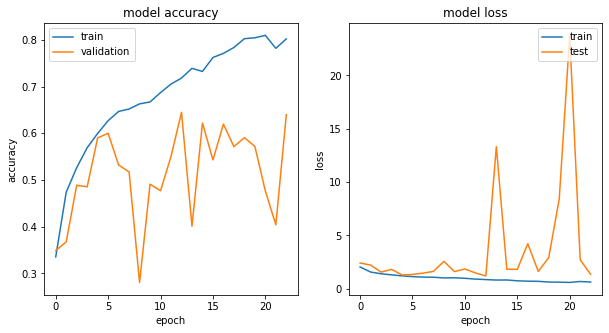

In [26]:
#plot accuracy and loss during training
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
VGG19_losses = pd.DataFrame(model.history.history)

In [28]:
VGG19_losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.035745,0.335503,2.406280,0.349065
1,1.560299,0.473967,2.214022,0.367757
2,1.398732,0.526521,1.552732,0.488785
3,1.294248,0.569156,1.806847,0.485514
4,1.202162,0.599675,1.291361,0.590187


### VGG19 Model Evaluation

In [40]:
# Evaluate the performance of the model
evaluate = model.evaluate_generator(
    test_batches, 
    steps = test_batches.samples // BATCH_SIZE, 
    verbose = 1
)

print('Test Accuracy : {}'.format(evaluate[1]))
print('\nTest loss: {}' .format(evaluate[0]))

104/104 [==============================] - 53s 513ms/step - loss: 1.6542 - accuracy: 0.5452
Test Accuracy : 0.545192301273346

Test loss: 1.654245138168335


#### VGG19 Confusion Matrix

In [41]:
Vgg19_pred = model.predict_generator(test_batches)
y_pred = np.argmax(Vgg19_pred, axis=1)
target_names = classes

In [55]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.summer):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                 precision    recall  f1-score   support

          Bread       0.51      0.67      0.58       368
  Dairy product       0.38      0.64      0.47       148
        Dessert       0.86      0.30      0.44       500
            Egg       0.72      0.56      0.63       335
     Fried food       0.55      0.71      0.62       287
           Meat       0.84      0.60      0.70       432
  Noodles-Pasta       0.70      0.72      0.71       147
           Rice       0.64      0.59      0.62        96
        Seafood       0.55      0.81      0.65       303
           Soup       0.86      0.86      0.86       500
Vegetable-Fruit       0.66      0.89      0.76       231

       accuracy                           0.65      3347
      macro avg       0.66      0.67      0.64      3347
   weighted avg       0.70      0.65      0.65      3347



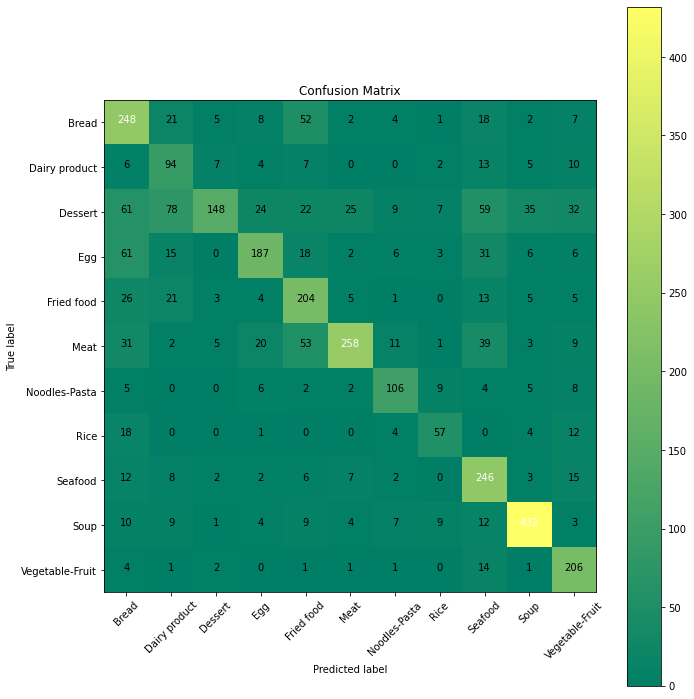

In [56]:
#Confution Matrix
cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

### Transfer Learning using ResNet 50

In [17]:
#import ResNet 50 library from Keras

from tensorflow.keras.applications.resnet50 import ResNet50

In [48]:
#Batch Configuration
batch_size = 64
train_input_shape = (224, 224, 3)
n_classes = 11

In [49]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True
    
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(128, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [50]:
optimizer = Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [51]:
# Freeze core ResNet layers  
for layer in model.layers[-6:]:
   layer.trainable = False

for layer in model.layers:
    layer.trainable = True



In [52]:
# Train Model for 50 epochs
history = model.fit_generator(train_batches, 
                              steps_per_epoch=train_batches.samples // batch_size,
                              validation_data=valid_batches, validation_steps=valid_batches.samples // batch_size,
                              epochs=50,
                              verbose=1,
                              callbacks=[early_stop],
                              workers=4                             
                              )

Epoch 1/50
154/154 [==============================] - 1935s 12s/step - loss: 2.3958 - accuracy: 0.1724 - val_loss: 2.4876 - val_accuracy: 0.1396
Epoch 2/50
154/154 [==============================] - 1455s 9s/step - loss: 2.1906 - accuracy: 0.2370 - val_loss: 2.4350 - val_accuracy: 0.1481
Epoch 3/50
154/154 [==============================] - 1221s 8s/step - loss: 2.0721 - accuracy: 0.2825 - val_loss: 2.3811 - val_accuracy: 0.1472
Epoch 4/50
154/154 [==============================] - 1217s 8s/step - loss: 1.9872 - accuracy: 0.3098 - val_loss: 2.2399 - val_accuracy: 0.1868
Epoch 5/50
154/154 [==============================] - 1224s 8s/step - loss: 1.9446 - accuracy: 0.3341 - val_loss: 1.9435 - val_accuracy: 0.2981
Epoch 6/50
154/154 [==============================] - 1206s 8s/step - loss: 1.8713 - accuracy: 0.3725 - val_loss: 1.7553 - val_accuracy: 0.4915
Epoch 7/50
154/154 [==============================] - 1199s 8s/step - loss: 1.8526 - accuracy: 0.3789 - val_loss: 1.6327 - val_accuracy

In [53]:
model.save('resnet50.h5')

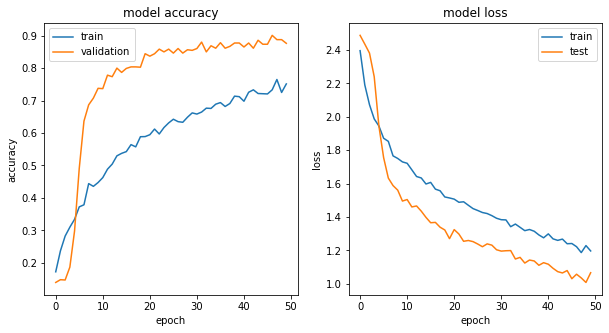

In [54]:
#plot accuracy and loss during training
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [55]:
resnet50_losses = pd.DataFrame(model.history.history)

In [56]:
resnet50_losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.395843,0.172403,2.487555,0.139623
1,2.190607,0.237013,2.435017,0.148113
2,2.072055,0.282468,2.381076,0.147170
3,1.987206,0.309850,2.239893,0.186792
4,1.944567,0.334091,1.943512,0.298113


#### ResNet 50 Model Evaluation

In [57]:
# Evaluate the performance of the model
evaluate = model.evaluate_generator(
    test_batches, 
    steps = test_batches.samples // 64, 
    verbose = 1
)

print('Test Accuracy : {}'.format(evaluate[1]))
print('\nTest loss: {}' .format(evaluate[0]))

52/52 [==============================] - 81s 2s/step - loss: 0.9671 - accuracy: 0.8702
Test Accuracy : 0.870192289352417

Test loss: 0.9671430587768555


#### ResNet 50 confusion matrix

In [58]:
resnet50_pred = model.predict_generator(test_batches)
y_pred = np.argmax(resnet50_pred, axis=1)
target_names = classes

In [63]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                 precision    recall  f1-score   support

          Bread       0.84      0.88      0.86       368
  Dairy product       0.78      0.80      0.79       148
        Dessert       0.82      0.88      0.85       500
            Egg       0.92      0.87      0.89       335
     Fried food       0.91      0.86      0.89       287
           Meat       0.89      0.91      0.90       432
  Noodles-Pasta       0.99      0.86      0.92       147
           Rice       0.93      0.98      0.95        96
        Seafood       0.94      0.92      0.93       303
           Soup       0.98      0.97      0.98       500
Vegetable-Fruit       0.95      0.96      0.96       231

       accuracy                           0.90      3347
      macro avg       0.91      0.90      0.90      3347
   weighted avg       0.90      0.90      0.90      3347



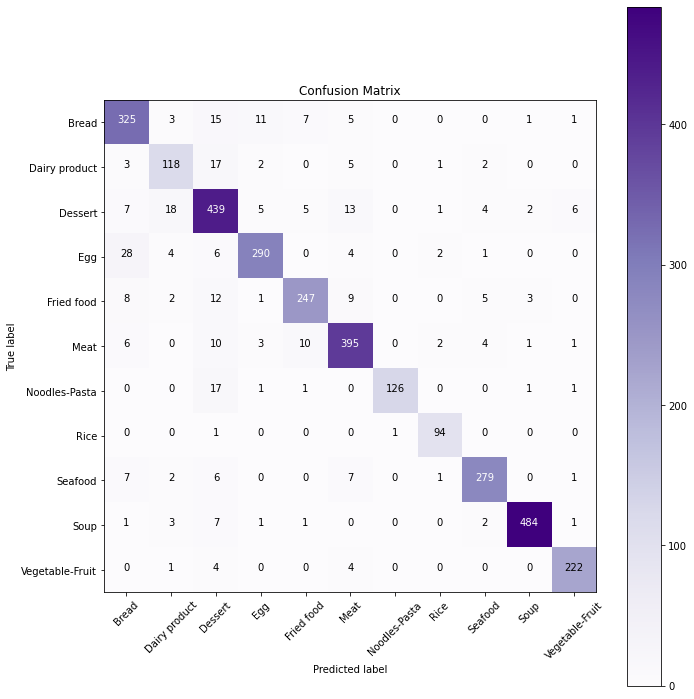

In [64]:
#Confution Matrix
cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_batches.classes, y_pred, target_names=target_names))